In [1]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def random_split(data, labels, lengths):
    r"""
    Randomly split a dataset into non-overlapping new datasets of given lengths.

    Arguments:  ## TO DO ##
        data (): Dataset to be split
        labels (): labels
        lengths (sequence): lengths of splits to be produced
    """
    if sum(lengths) != len(labels):
        raise ValueError("Sum of input lengths does not equal the length of the input dataset!")
        
    indices = torch.randperm(sum(lengths))
    train_ind, test_ind = indices.split_with_sizes( lengths)
        
    train_data = data[train_ind]
    test_data = data[test_ind]

    train_labels = labels[train_ind]
    test_labels = labels[test_ind]

    train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
    test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)   
    
    return train_dataset, test_dataset

In [3]:
raw_data = np.load('./data/classification_problem.npy')
data = torch.from_numpy(raw_data)
labels = torch.from_numpy(np.array([0]*1000+[1]*1000+[2]*1000))

In [4]:
train_dataset, validation_dataset = random_split(data, labels, (2000,1000) )

In [5]:
## Y're fuckin' idiot. LEARN!!!

In [6]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=50, 
                                           shuffle=True)

In [7]:
model = torch.nn.Sequential(
    nn.Linear(12,200), nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200,200), nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200,200), nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200,3),
    nn.BatchNorm1d(3)
)

In [8]:
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum= 0.99)

In [9]:
loss_f = nn.CrossEntropyLoss()

In [10]:
errors = []
batches = 0
epochs = 0

In [19]:
%%time
model.train()

for e in range(1000):
    for d in train_loader:        
        optim.zero_grad()
        features, labels = d
        pred = model(features)
        loss = loss_f(pred, labels)
        errors.append(loss.item())
        loss.backward()
        optim.step()
        batches += 1
    epochs += 1   
    if e%10 ==0:
        print("epoch: ", e,"loss:\t", loss)        

epoch:  0 loss:	 tensor(0.9672, grad_fn=<NllLossBackward>)
epoch:  10 loss:	 tensor(0.7635, grad_fn=<NllLossBackward>)
epoch:  20 loss:	 tensor(1.3630, grad_fn=<NllLossBackward>)
epoch:  30 loss:	 tensor(0.5435, grad_fn=<NllLossBackward>)
epoch:  40 loss:	 tensor(0.9031, grad_fn=<NllLossBackward>)
epoch:  50 loss:	 tensor(0.5956, grad_fn=<NllLossBackward>)
epoch:  60 loss:	 tensor(1.3046, grad_fn=<NllLossBackward>)
epoch:  70 loss:	 tensor(0.7683, grad_fn=<NllLossBackward>)
epoch:  80 loss:	 tensor(0.8874, grad_fn=<NllLossBackward>)
epoch:  90 loss:	 tensor(0.9181, grad_fn=<NllLossBackward>)
epoch:  100 loss:	 tensor(0.5822, grad_fn=<NllLossBackward>)
epoch:  110 loss:	 tensor(0.7601, grad_fn=<NllLossBackward>)
epoch:  120 loss:	 tensor(0.8753, grad_fn=<NllLossBackward>)
epoch:  130 loss:	 tensor(0.5728, grad_fn=<NllLossBackward>)
epoch:  140 loss:	 tensor(0.7023, grad_fn=<NllLossBackward>)
epoch:  150 loss:	 tensor(1.5440, grad_fn=<NllLossBackward>)
epoch:  160 loss:	 tensor(0.7460, g

epoch:  1340 loss:	 tensor(0.6140, grad_fn=<NllLossBackward>)
epoch:  1350 loss:	 tensor(0.9024, grad_fn=<NllLossBackward>)
epoch:  1360 loss:	 tensor(1.0336, grad_fn=<NllLossBackward>)
epoch:  1370 loss:	 tensor(0.5501, grad_fn=<NllLossBackward>)
epoch:  1380 loss:	 tensor(0.9797, grad_fn=<NllLossBackward>)
epoch:  1390 loss:	 tensor(0.9687, grad_fn=<NllLossBackward>)
epoch:  1400 loss:	 tensor(0.9364, grad_fn=<NllLossBackward>)
epoch:  1410 loss:	 tensor(0.6941, grad_fn=<NllLossBackward>)
epoch:  1420 loss:	 tensor(0.8235, grad_fn=<NllLossBackward>)
epoch:  1430 loss:	 tensor(0.6256, grad_fn=<NllLossBackward>)
epoch:  1440 loss:	 tensor(0.6011, grad_fn=<NllLossBackward>)
epoch:  1450 loss:	 tensor(0.5100, grad_fn=<NllLossBackward>)
epoch:  1460 loss:	 tensor(1.2216, grad_fn=<NllLossBackward>)
epoch:  1470 loss:	 tensor(0.9274, grad_fn=<NllLossBackward>)
epoch:  1480 loss:	 tensor(0.5997, grad_fn=<NllLossBackward>)
epoch:  1490 loss:	 tensor(1.0507, grad_fn=<NllLossBackward>)
epoch:  

epoch:  2670 loss:	 tensor(0.6025, grad_fn=<NllLossBackward>)
epoch:  2680 loss:	 tensor(0.9994, grad_fn=<NllLossBackward>)
epoch:  2690 loss:	 tensor(0.4283, grad_fn=<NllLossBackward>)
epoch:  2700 loss:	 tensor(0.5325, grad_fn=<NllLossBackward>)
epoch:  2710 loss:	 tensor(0.8636, grad_fn=<NllLossBackward>)
epoch:  2720 loss:	 tensor(0.5102, grad_fn=<NllLossBackward>)
epoch:  2730 loss:	 tensor(1.0014, grad_fn=<NllLossBackward>)
epoch:  2740 loss:	 tensor(0.7030, grad_fn=<NllLossBackward>)
epoch:  2750 loss:	 tensor(1.0579, grad_fn=<NllLossBackward>)
epoch:  2760 loss:	 tensor(0.9251, grad_fn=<NllLossBackward>)
epoch:  2770 loss:	 tensor(0.5229, grad_fn=<NllLossBackward>)
epoch:  2780 loss:	 tensor(0.6246, grad_fn=<NllLossBackward>)
epoch:  2790 loss:	 tensor(0.6717, grad_fn=<NllLossBackward>)
epoch:  2800 loss:	 tensor(0.6780, grad_fn=<NllLossBackward>)
epoch:  2810 loss:	 tensor(0.8467, grad_fn=<NllLossBackward>)
epoch:  2820 loss:	 tensor(0.4601, grad_fn=<NllLossBackward>)
epoch:  

epoch:  4000 loss:	 tensor(0.6601, grad_fn=<NllLossBackward>)
epoch:  4010 loss:	 tensor(0.5317, grad_fn=<NllLossBackward>)
epoch:  4020 loss:	 tensor(0.5878, grad_fn=<NllLossBackward>)
epoch:  4030 loss:	 tensor(1.2726, grad_fn=<NllLossBackward>)
epoch:  4040 loss:	 tensor(0.6139, grad_fn=<NllLossBackward>)
epoch:  4050 loss:	 tensor(0.3647, grad_fn=<NllLossBackward>)
epoch:  4060 loss:	 tensor(0.8824, grad_fn=<NllLossBackward>)
epoch:  4070 loss:	 tensor(0.7432, grad_fn=<NllLossBackward>)
epoch:  4080 loss:	 tensor(0.6143, grad_fn=<NllLossBackward>)
epoch:  4090 loss:	 tensor(0.4771, grad_fn=<NllLossBackward>)
epoch:  4100 loss:	 tensor(0.6824, grad_fn=<NllLossBackward>)
epoch:  4110 loss:	 tensor(0.6246, grad_fn=<NllLossBackward>)
epoch:  4120 loss:	 tensor(0.4678, grad_fn=<NllLossBackward>)
epoch:  4130 loss:	 tensor(0.4986, grad_fn=<NllLossBackward>)
epoch:  4140 loss:	 tensor(0.6650, grad_fn=<NllLossBackward>)
epoch:  4150 loss:	 tensor(0.5521, grad_fn=<NllLossBackward>)
epoch:  

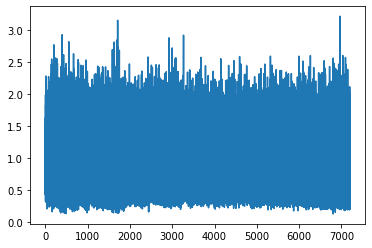

In [20]:
plt.plot(np.linspace(0,epochs, batches),errors)

In [21]:
model.eval()
with torch.no_grad():
    pred = torch.softmax(model(train_dataset[:][0]),1)
    pred_labels= torch.argmax(pred,1)
    true_label = train_dataset[:][1]
    
    ac = torch.sum(torch.argmax(pred,1)==train_dataset[:][1]).to(dtype=torch.float32)/len(train_dataset)
ac

tensor(0.7270)

In [22]:
model.eval()
with torch.no_grad():
    pred = torch.softmax(model(validation_dataset[:][0]),1)
    ac = torch.sum(torch.argmax(pred,1)==validation_dataset[:][1]).to(dtype=torch.float32)/len(validation_dataset)
ac    

tensor(0.6750)